In [9]:
#pip install opencv-python

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import walk
import os
import glob
import tensorflow as tf

## To resize the images by 150*150 

In [11]:
# Define the path to your folder containing images
folder_path = './images'                  # Replace with the path to your folder

# Create a new folder to save the resized images
output_folder = './re_images'             # Replace with the path for saving resized images
os.makedirs(output_folder, exist_ok=True)

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')): 
       # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Resize the image to 150x150
        resized_image = cv2.resize(image, (150, 150))

        # Save the resized image in the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_image)

        print(f"Resized and saved {filename}")



Resized and saved c3.jpeg
Resized and saved d4.jpg
Resized and saved d2.jpg
Resized and saved d1.jpeg
Resized and saved c4.jpg
Resized and saved c5.jpg


## 1. Manually label the images 

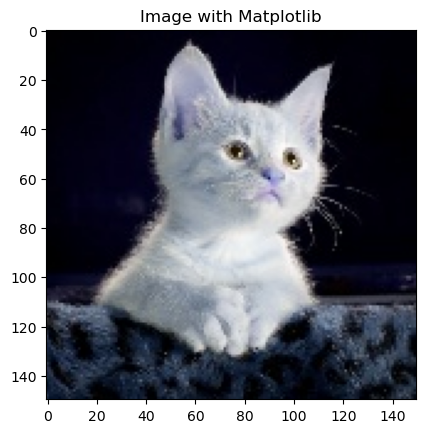

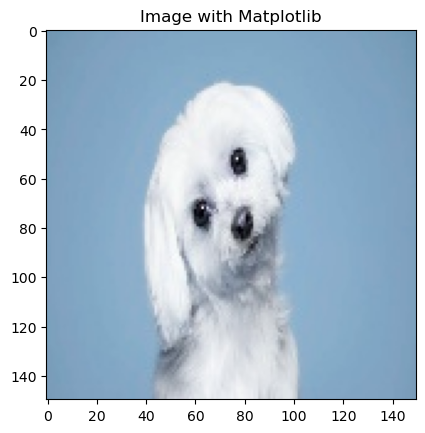

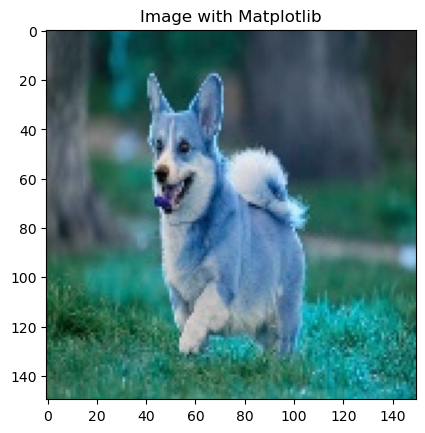

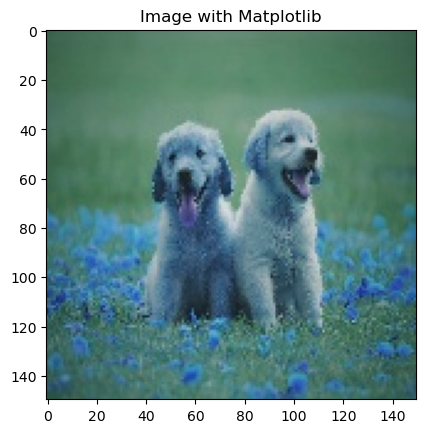

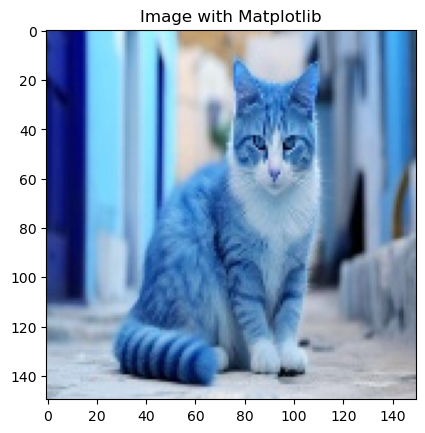

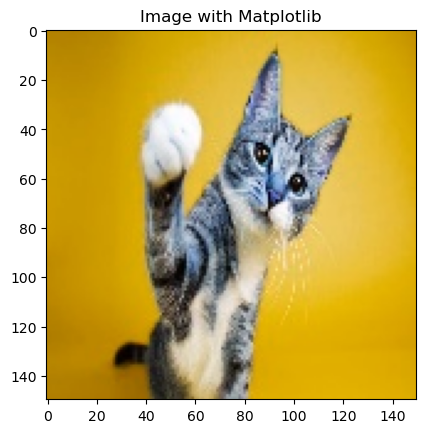

In [12]:
image_dir = './re_images'  #path to the image folder containing images to labe
image_files = os.listdir(image_dir)

labels = []

# Iterate through subfolders if the image folder has any subfolders
for label in os.listdir(image_dir):
    subfolder_path = os.path.join(image_dir, label)
    
    if os.path.isdir(subfolder_path):
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)
            img = cv2.imread(image_path)
            
            if img is None:
                print(f"Failed to load image at {image_path}.")
            else:
                print(f"Image loaded successfully with shape: {img.shape}")
            # Display the image          
            plt.imshow(img)
            plt.title("Image with Matplotlib")
            plt.show()
                
            # Wait for user input and close the image window
            label = input(f"Enter label for {image_file}: ")
            labels.append((image_file, label))
            cv2.destroyAllWindows()
    else:               # if the image folder does not have any subfolders
        for image_file in image_files:
            image_path = os.path.join(image_dir, image_file)
            img = cv2.imread(image_path)

            
#             if img is None:
#                 print(f"Failed to load image at {image_path}.")
#             else:
#                 print(f"Image loaded successfully with shape: {img.shape}")
            # Display the image          
            plt.imshow(img)
            plt.title("Image with Matplotlib")
            plt.show()

            # Wait for user input and close the image window
            label = input(f"Enter label for {image_file}: ")
            labels.append((image_file, label))
    
            cv2.destroyAllWindows()
        break
        
# Save the labels to a file or process them further
with open('image_labels.txt', 'w') as f:
    for image_file, label in labels:
        f.write(f"{image_file}: {label}\n")

#### With this separate text file (image_labels.txt) containing labels, the model can be fed with  the labels for the input images.

## 2. Through subfolders' names, labelling can be interpreted

In [13]:
import os

# Directory containing folders of images
image_dir = 'images_folder'
#image_files = os.listdir(image_dir)
labels = []

# Iterate through subfolders
for label in os.listdir(image_dir):
    subfolder_path = os.path.join(image_dir, label)
    
    if os.path.isdir(subfolder_path):
        # Assign label based on folder name
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)
            labels.append((image_path, label))

# Save or use the labels
with open('automatic_image_labels.txt', 'w') as f:
    for image_path, label in labels:
        f.write(f"{image_path}: {label}\n")


In [14]:
labels

[('images_folder/cat/c3.jpeg', 'cat'),
 ('images_folder/cat/c4.jpg', 'cat'),
 ('images_folder/cat/c5.jpg', 'cat'),
 ('images_folder/dog/d4.jpg', 'dog'),
 ('images_folder/dog/d2.jpg', 'dog'),
 ('images_folder/dog/d1.jpeg', 'dog')]

#### Here, you can observe the labels are automatically interpreted through the corresponding folder name.  

In [21]:
print(img.shape) 
h, w, c = img.shape 
print("Dimensions of the image is:\nHeight:", h, "pixel’s Width:", w, "pixel’s Number of Channels:", c)

(168, 300, 3)
Dimensions of the image is:
Height: 168 pixel’s Width: 300 pixel’s Number of Channels: 3


In [23]:
print(type(img))
print(img.dtype)
print(img)

<class 'numpy.ndarray'>
uint8
[[[ 31  27  33]
  [ 31  27  33]
  [ 31  27  33]
  ...
  [ 37  33  45]
  [ 38  34  46]
  [ 40  36  48]]

 [[ 32  28  34]
  [ 31  27  33]
  [ 30  26  32]
  ...
  [ 34  30  42]
  [ 35  31  43]
  [ 35  31  43]]

 [[ 32  30  36]
  [ 30  28  34]
  [ 28  26  32]
  ...
  [ 31  27  38]
  [ 32  28  40]
  [ 31  27  39]]

 ...

 [[ 46  54  71]
  [ 42  50  67]
  [ 40  48  65]
  ...
  [ 40  62  97]
  [ 37  60  92]
  [ 41  64  96]]

 [[ 35  45  62]
  [ 44  54  71]
  [ 48  58  75]
  ...
  [ 39  64  98]
  [ 40  65  97]
  [ 37  62  94]]

 [[ 39  49  66]
  [ 34  44  61]
  [ 35  45  62]
  ...
  [ 46  71 105]
  [ 47  72 106]
  [ 46  71 103]]]
